# Desafio AAWZ
## Título
Desenvolver uma análise quantitativa e gráfica relacionando o aumento das ações da Petrobrás (PETR4) com as variações da taxa SELIC para os últimos 10 anos.
## Objetivo
Fazer um programa em python para:
- Extrair as informações dos sites: https://www.infomoney.com.br/petrobras-petr4/cotacoes e 
https://www.bcb.gov.br/pec/copom/port/taxaselic.asp e tratá-las;
- Armazenar as informações tratadas no SQLite;
 - Utilizar, de preferência, ORM (object relational mapping)
- Ler as informações do banco e apresentar em formato gráfico.

## Restrições
- Utilizar a biblioteca pandas do Python"

---
## ETL
- Vou utilizar a granularidade **anual** para a análise.
- Será feito 2 scrapping. Para garantir um serviço menos monolítico farei cada scrapping separado. Desta forma é possível garantir uma melhor manutenção de código.


## Granularidade anual: 
- Tanto a taxa selic quanto a PETR4 devem ser de mesma granularidade
- Nível do grão = ano
- Isso garante insights mais fáceis entre os dados

## Banco de dados
- As 2 tabelas no banco de dados armazenam somente os dados de fechamento.
- Acredito que assim trás uma análise mais fundamentalista sobre índices e ativos financeiros.
- Fiz algumas conversões de tipo para armazenar a menor quantidade possível de dados. 

In [13]:
import numpy as np
import pandas as pd
import sqlite3
import IPython.terminal

import matplotlib.pyplot as plt
%matplotlib inline

# para visualizar de forma ampla dentro do notebook
plt.rcParams['figure.figsize'] = (15, 8)

In [2]:
! python3 etl_PETR4.py

get page:  <Response [200]>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4961 entries, 0 to 0
Data columns (total 2 columns):
Ano           4961 non-null int16
Fechamento    4961 non-null float16
dtypes: float16(1), int16(1)
memory usage: 58.1 KB
None

(petr4.db) salvo!


In [3]:
! python3 etl_SELIC.py

get page:  <Response [200]>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 0
Data columns (total 2 columns):
Ano           81 non-null int16
Taxa SELIC    81 non-null float16
dtypes: float16(1), int16(1)
memory usage: 972.0 bytes
None

(selic.db) salvo!


### Load

In [4]:
# Create connection
conn = sqlite3.connect('desafio_AAWZ.db')

#load data
df_selic = pd.read_sql_query("SELECT * FROM selic", conn)
df_petr4 = pd.read_sql_query("SELECT * FROM petr4", conn)

In [5]:
print(df_selic)

    Ano  Taxa SELIC
0  2009    8.648438
1  2010   10.656250
2  2011   10.898438
3  2012    7.140625
4  2013    9.898438
5  2014   11.648438
6  2015   14.148438
7  2016   13.648438
8  2017    6.898438
9  2018    6.648438


In [6]:
print(df_petr4)

    Ano  Fechamento
0  2009   36.687500
1  2010   27.296875
2  2011   21.484375
3  2012   19.515625
4  2013   17.078125
5  2014   10.023438
6  2015    6.699219
7  2016   14.867188
8  2017   16.093750
9  2018   27.593750


### Gráficos

#### Gráfico SELIC

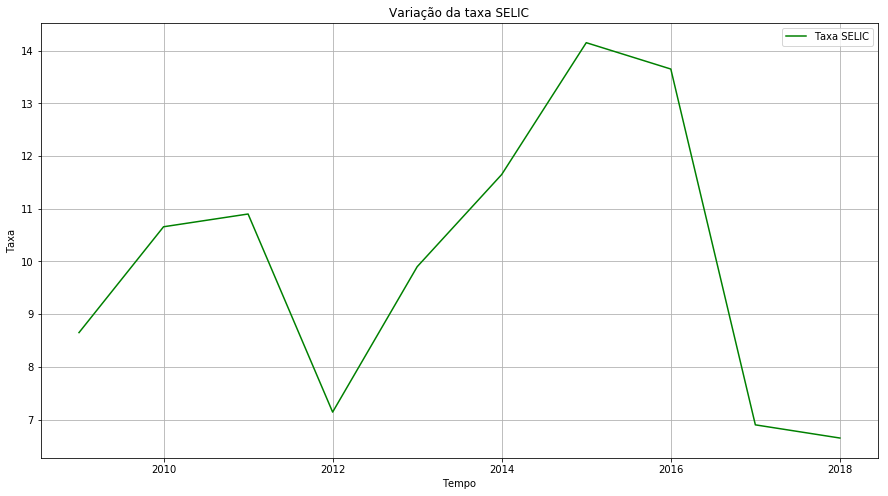

In [14]:
# visualização do gráfico SELIC\n",
x_selic = df_selic['Ano']
y_selic = df_selic['Taxa SELIC']

fig, selic_grafico = plt.subplots()
plt.plot(x_selic, y_selic, color='green', label='Taxa SELIC')
plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Taxa')
plt.title("Variação da taxa SELIC")
plt.legend(loc="upper right")
plt.legend()
plt.show()

#### Gráfico PETR4

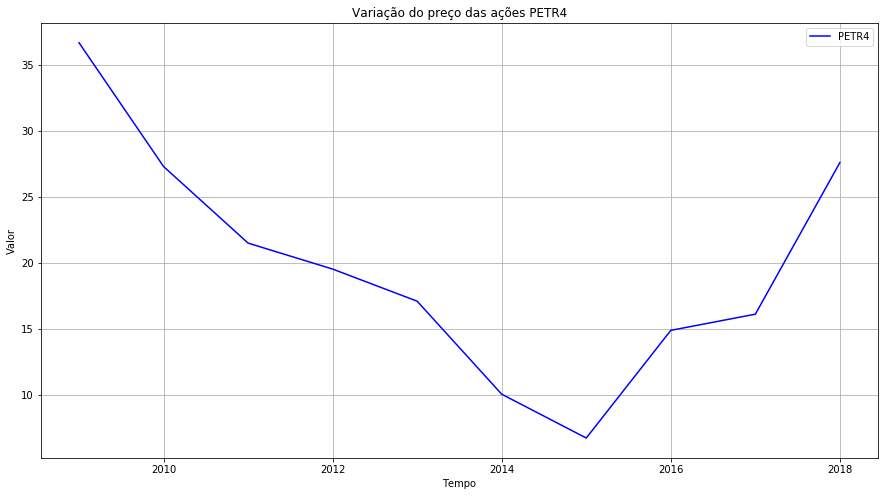

In [15]:
# visualização do gráfico PETR4\n",
x_petr4 = df_petr4['Ano']
y_petr4 = df_petr4['Fechamento']

fig, petr4_grafico = plt.subplots()
plt.plot(x_petr4, y_petr4, color='blue', label='PETR4')
plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title("Variação do preço das ações PETR4")
plt.legend(loc="upper right")
plt.legend()
plt.show()

#### Plotagem no mesmo gráfico

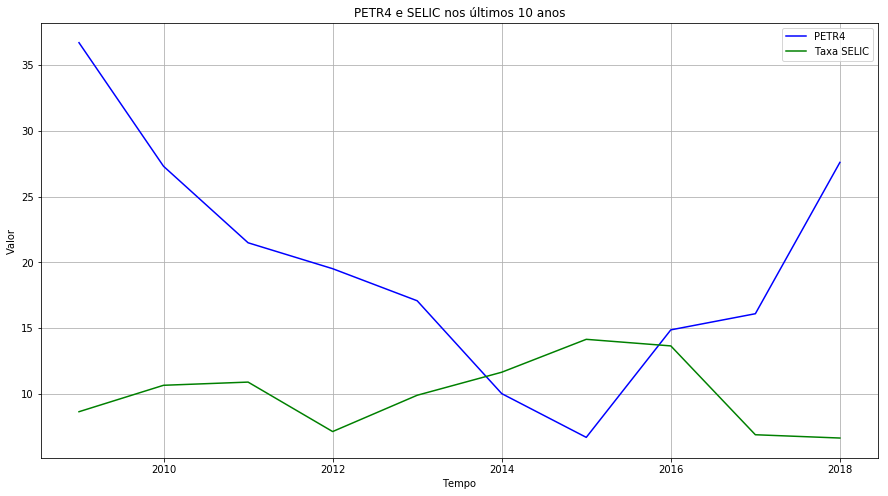

In [16]:
petr4_grafico = plt.plot(x_petr4, y_petr4, color='blue', label='PETR4')
selic_grafico = plt.plot(x_selic, y_selic, color='green', label='Taxa SELIC')

plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title("PETR4 e SELIC nos últimos 10 anos")
plt.legend(loc="upper right")
plt.legend()
plt.show()

## Predição do fechamento do preço PETR4 a partir da taxa SELIC

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_selic[['Taxa SELIC']]

# escolhendo a variável dependente\n",
y = df_petr4[['Fechamento']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    test_size=0.20)

In [32]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)

# prediction valor aleatório\n",
meta_selic = 10
predicao_petr4 = model.predict(meta_selic)

print(f'A predição do fechamento anual para PETR4, (se meta SELIC = {meta_selic}) baseado numa regressão linear é: R${predicao_petr4} reais.')

A predição do fechamento anual para PETR4, (se meta SELIC = 10) baseado numa regressão linear é: R$[[21.86948204]] reais.
